# NYC Taxi Model

In [166]:
import numpy as np
import pandas as pd

In [167]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [168]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150

In [169]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'

In [170]:
df = pd.read_csv('data/nyc_taxi.csv')
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
10679302         1  2015-01-10 19:01:44   2015-01-10 19:05:40   
10679303         1  2015-01-10 19:01:44   2015-01-10 19:07:26   
10679304         1  2015-01-10 19:01:44   2015-01-10 19:15:01   
10679305         1  2015-01-10 19:01:44   2015-01-10 19:17:03   
10679306         1  2015-01-10 19:01:45   2015-01-10 19:07:33   

          passenger_count  trip_distance      pickup_x      pickup_y  \
10679302                2            1.0 -8.232298e+06  4.980860e+06   
10679303                2            0.8 -8.235721e+06  4.972331e+06   
10679304                1            3.4 -8.235341e+06  4.975470e+06   
10679305                1            1.3 -8.237594e+06  4.973844e+06   
10679306                1            0.7 -8.233229e+06  4.977946e+06   

          RateCodeID store_and_fwd_flag     dropoff_x     dropoff_y  \
10679302           1                  N -8.232492e+06  4.979234e+06   
10679303           1                  N -8.234857e+06  4.971131e+06   
10679304           1                  N -8.234203e+06  4.981092e+06   
10679305           1                  N -8.235618e+06  4.973722e+06   
10679306           1                  N -8.234152e+06  4.977120e+06   

          payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
10679302             1          5.5    0.0      0.5        1.25           0.0   
10679303             1          6.0    0.0      0.5        2.00           0.0   
10679304             2         13.5    0.0      0.5        0.00           0.0   
10679305             1         10.5    0.0      0.5        2.25           0.0   
10679306             2          5.5    0.0      0.5        0.00           0.0   

          improvement_surcharge  total_amount  
10679302                    0.3          7.55  
10679303                    0.3          8.80  
10679304                    0.3         14.30  
10679305                    0.3         13.55  
10679306                    0.3          6.30

In [171]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:58:31                1   

   trip_distance      pickup_x      pickup_y  RateCodeID store_and_fwd_flag  \
0           1.59 -8.236963e+06  4.975553e+06           1                  N   
1           3.30 -8.237826e+06  4.971752e+06           1                  N   
2           0.50 -8.238654e+06  4.970221e+06           1                  N   
3           3.00 -8.234434e+06  4.977363e+06           1                  N   
4           2.20 -8.235781e+06  4.972012e+06           1                  N   

      dropoff_x     dropoff_y  payment_type  fare_amount  extra  mta_tax  \
0 -8.234835e+06  4.975627e+06             1         12.0    1.0      0.5   
1 -8.237021e+06  4.976875e+06             1         14.5    0.5      0.5   
2 -8.238124e+06  4.971127e+06             2          3.5    0.5      0.5   
3 -8.238108e+06  4.974457e+06             2         15.0    0.5      0.5   
4 -8.236804e+06  4.975483e+06             2         14.0    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        3.25           0.0                    0.3         17.05  
1        2.00           0.0                    0.3         17.80  
2        0.00           0.0                    0.3          4.80  
3        0.00           0.0                    0.3         16.30  
4        0.00           0.0                    0.3         15.30

In [172]:
#df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour.astype('category')
df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

In [173]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_x                 float64
pickup_y                 float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_x                float64
dropoff_y                float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
hour                       int64
dtype: object

In [174]:
#df['weekday'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.weekday.astype('category')
df['weekday'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.weekday

# Create train and test

In [175]:
#testSetSize = 2000000
#testSetPosns = np.random.choice(df.shape[0],testSetSize, replace = False)

In [176]:
#testSet = df.iloc[testSetPosns]
#trainSet = df.drop(testSetPosns)

In [177]:
print (df.shape)
print (trainSet.shape)
print (testSet.shape)

(10679307, 21)
(8679307, 21)
(2000000, 21)


In [178]:
trainSmallSize = 100000
trainSmallPosns = np.random.choice(df.shape[0],trainSmallSize, replace = False)

In [179]:
trainSmall = df.iloc[trainSmallPosns]

In [180]:
trainSmall.shape

(100000, 21)

In [181]:
trainSmall.shape[0]/df.shape[0]*100

0.9363903481752139

In [182]:
trainSmall.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
24728            2  2015-01-15 18:11:40   2015-01-15 18:24:15   
10457056         2  2015-01-24 22:23:03   2015-01-24 22:28:12   
881391           1  2015-01-02 12:47:51   2015-01-02 13:00:40   
6475699          2  2015-01-09 15:02:32   2015-01-09 15:12:33   
1758380          1  2015-01-29 21:01:12   2015-01-29 21:16:56   

          passenger_count  trip_distance      pickup_x      pickup_y  \
24728                   2           1.32 -8.237850e+06  4.974216e+06   
10457056                4           1.06 -8.234095e+06  4.976276e+06   
881391                  1           2.50 -8.235466e+06  4.975321e+06   
6475699                 3           1.41 -8.237527e+06  4.971584e+06   
1758380                 1           2.90 -8.234670e+06  4.976369e+06   

          RateCodeID store_and_fwd_flag     dropoff_x   ...     payment_type  \
24728              1                  N -8.236307e+06   ...                2   
10457056           1                  N -8.235191e+06   ...                1   
881391             1                  N -8.232688e+06   ...                1   
6475699            1                  N -8.237934e+06   ...                1   
1758380            1                  N -8.237234e+06   ...                1   

          fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
24728             9.5    1.0      0.5        0.00           0.0   
10457056          6.0    0.5      0.5        1.46           0.0   
881391           11.5    0.0      0.5        2.30           0.0   
6475699           8.0    0.0      0.5        2.00           0.0   
1758380          13.0    0.5      0.5        1.00           0.0   

          improvement_surcharge  total_amount  hour  weekday  
24728                       0.3         11.30    18        3  
10457056                    0.3          8.76    22        5  
881391                      0.0         14.60    12        4  
6475699                     0.3         10.80    15        4  
1758380                     0.3         15.30    21        3  

[5 rows x 21 columns]

In [183]:
trainSmall.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_x                 float64
pickup_y                 float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_x                float64
dropoff_y                float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
hour                       int64
weekday                    int64
dtype: object

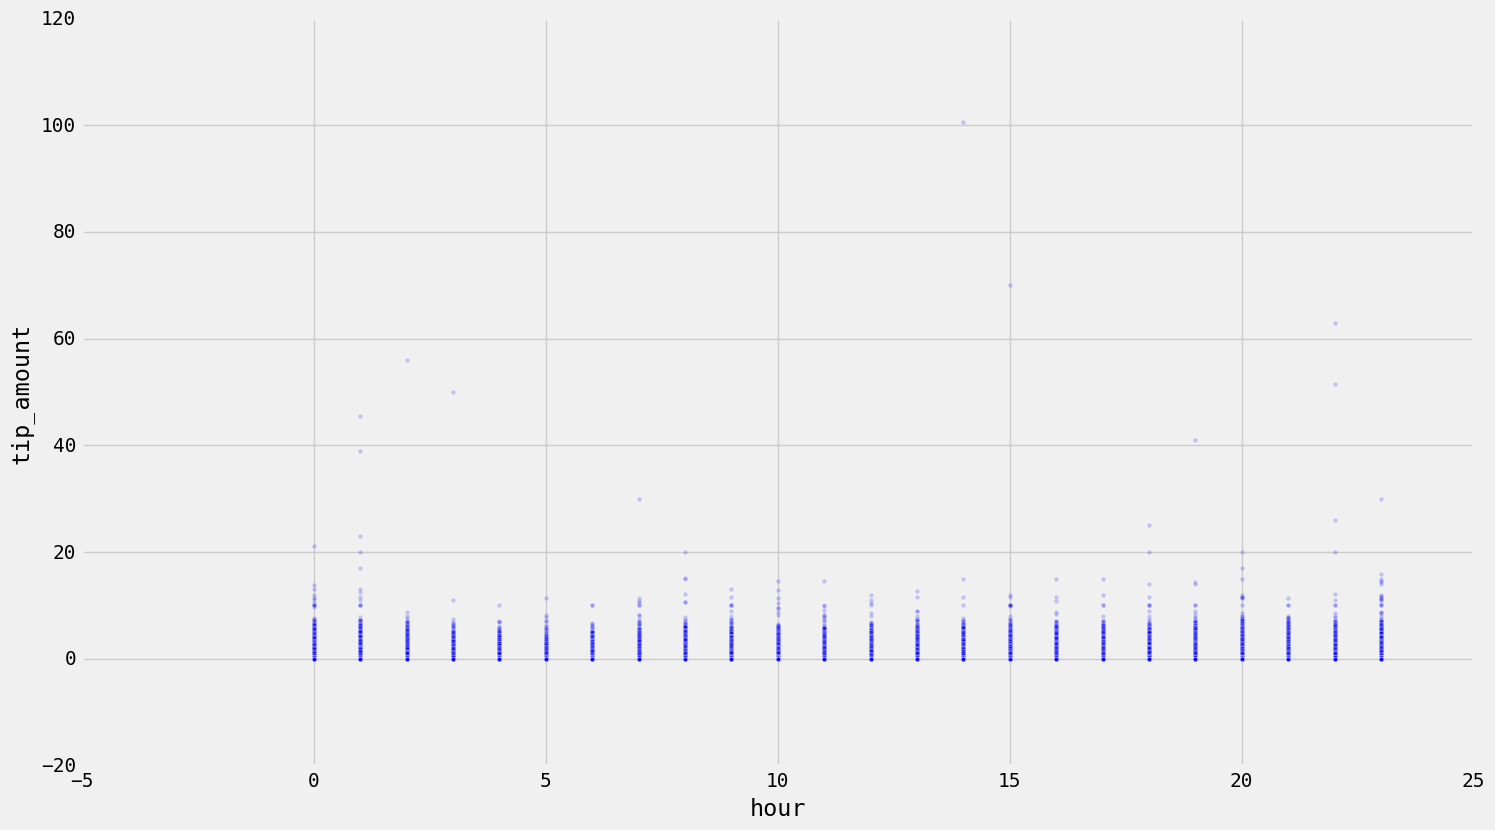

In [184]:
trainSmall.plot(x = "hour", y = "tip_amount" , kind = "scatter", s = 10, alpha = 0.2)

In [185]:
from sklearn import linear_model

In [186]:
model_ols = linear_model.LinearRegression(normalize = True)

In [187]:
trainSmall.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
24728            2  2015-01-15 18:11:40   2015-01-15 18:24:15   
10457056         2  2015-01-24 22:23:03   2015-01-24 22:28:12   
881391           1  2015-01-02 12:47:51   2015-01-02 13:00:40   
6475699          2  2015-01-09 15:02:32   2015-01-09 15:12:33   
1758380          1  2015-01-29 21:01:12   2015-01-29 21:16:56   

          passenger_count  trip_distance      pickup_x      pickup_y  \
24728                   2           1.32 -8.237850e+06  4.974216e+06   
10457056                4           1.06 -8.234095e+06  4.976276e+06   
881391                  1           2.50 -8.235466e+06  4.975321e+06   
6475699                 3           1.41 -8.237527e+06  4.971584e+06   
1758380                 1           2.90 -8.234670e+06  4.976369e+06   

          RateCodeID store_and_fwd_flag     dropoff_x   ...     payment_type  \
24728              1                  N -8.236307e+06   ...                2   
10457056           1                  N -8.235191e+06   ...                1   
881391             1                  N -8.232688e+06   ...                1   
6475699            1                  N -8.237934e+06   ...                1   
1758380            1                  N -8.237234e+06   ...                1   

          fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
24728             9.5    1.0      0.5        0.00           0.0   
10457056          6.0    0.5      0.5        1.46           0.0   
881391           11.5    0.0      0.5        2.30           0.0   
6475699           8.0    0.0      0.5        2.00           0.0   
1758380          13.0    0.5      0.5        1.00           0.0   

          improvement_surcharge  total_amount  hour  weekday  
24728                       0.3         11.30    18        3  
10457056                    0.3          8.76    22        5  
881391                      0.0         14.60    12        4  
6475699                     0.3         10.80    15        4  
1758380                     0.3         15.30    21        3  

[5 rows x 21 columns]

In [188]:
df['tips'] = 0

In [189]:
df['tips'] = df['tip_amount'].apply(lambda x: 1 if x > 0 else 0)

In [190]:
X = df.loc[:,('dropoff_x', 'dropoff_y', 'hour', 'weekday', 'passenger_count')]

In [191]:
X.head()

dropoff_x     dropoff_y  hour  weekday  passenger_count
0 -8.234835e+06  4.975627e+06    19        3                1
1 -8.237021e+06  4.976875e+06    20        5                1
2 -8.238124e+06  4.971127e+06    20        5                1
3 -8.238108e+06  4.974457e+06    20        5                1
4 -8.236804e+06  4.975483e+06    20        5                1

In [192]:
y = df.loc[:,'tips']

In [193]:
ols = model_ols.fit(X,y)

In [194]:
Y = ols.predict(X)

In [195]:
ols.score(X, y)

0.0055173685795107952

In [196]:
df['tip_pred'] = Y

In [197]:
df['tip_error'] = df['tip_pred'] - df['tips']

In [198]:
df.tip_pred.describe()

count    1.067931e+07
mean     5.988104e-01
std      3.640705e-02
min      4.583978e-01
25%      5.731273e-01
50%      5.976916e-01
75%      6.241813e-01
max      7.138125e-01
Name: tip_pred, dtype: float64

In [199]:
df.tip_error.describe()

count    1.067931e+07
mean     7.596345e-15
std      4.887853e-01
min     -5.384242e-01
25%     -4.076734e-01
50%     -3.611041e-01
75%      5.833490e-01
max      7.132854e-01
Name: tip_error, dtype: float64

In [200]:
df.shape

(10679307, 24)

In [201]:
ols.coef_

array([ -3.28748243e-06,  -9.44581328e-06,   1.19077150e-03,
        -4.80892474e-03,  -7.10373769e-03])

In [202]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

NYC = x_range, y_range = ((-8242000,-8225000), (4966000,4984000))

background = "black"
plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, background_fill_color=background, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='orange', size=5, alpha = 0.1)

Loading BokehJS ...

In [203]:
df.dropoff_x.min()

-8243206.9343600003

In [204]:
df.dropoff_x.max()

-8226510.5394800007

In [205]:
df.dropoff_y.min()

4968192.0422099996

In [206]:
df.dropoff_y.max()

4982886.20438

In [207]:
samples = trainSmall

In [208]:
samples.shape

(100000, 21)

In [209]:
%%time
p = base_plot()

p.circle(x=samples['dropoff_x'], y=samples['dropoff_y'], **options)
show(p)

CPU times: user 1.08 s, sys: 148 ms, total: 1.23 s
Wall time: 1.47 s


In [210]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
Greys9_r = list(reversed(Greys9))[:-2]

In [214]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.mean('tips'))
    img = tf.shade(agg, cmap=Hot, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot()
export(create_image(*NYC),"NYCT_hot")
InteractiveImage(p, create_image)

In [215]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.mean('tip_pred'))
    img = tf.shade(agg, cmap=viridis, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot()
export(create_image(*NYC),"NYCT_hot")
InteractiveImage(p, create_image)

In [217]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.mean('tip_error'))
    img = tf.shade(agg, cmap=inferno, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot()
export(create_image(*NYC),"NYCT_hot")
InteractiveImage(p, create_image)

In [ ]:
colors = ["#FF0000","#FF3F00","#FF7F00","#FFBF00","#FFFF00","#BFFF00","#7FFF00","#3FFF00",
          "#00FF00","#00FF3F","#00FF7F","#00FFBF","#00FFFF","#00BFFF","#007FFF","#003FFF",
          "#0000FF","#3F00FF","#7F00FF","#BF00FF","#FF00FF","#FF00BF","#FF007F","#FF003F",]

def colorized_images(x_range, y_range, w=plot_width, h=plot_height, dataset="pickup"):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, dataset+'_x', dataset+'_y', ds.count_cat('hour'))
    img = tf.shade(agg, color_key=colors)
    return tf.dynspread(img, threshold=0.3, max_px=4)

p = base_plot(background_fill_color=background)
#p.add_tile(STAMEN_TERRAIN)
export(colorized_images(*NYC, dataset="pickup"),"NYCT_pickup_times")
InteractiveImage(p, colorized_images, dataset="pickup")

In [ ]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

def base_plot():
    q = figure(
        x_range=(0, 20),
        y_range=(0, 40),
        tools='pan,wheel_zoom,box_zoom,reset', 
        plot_width=800, 
        plot_height=500,
    )
    q.xgrid.grid_line_color = None
    q.ygrid.grid_line_color = None
    q.xaxis.axis_label = "Distance, miles"
    q.yaxis.axis_label = "Fare, $"
    q.xaxis.axis_label_text_font_size = '12pt'
    q.yaxis.axis_label_text_font_size = '12pt'
    return q
    
options = dict(line_color=None, fill_color='blue', size=5)

In [ ]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage

In [ ]:
q = base_plot()
pipeline = ds.Pipeline(df, ds.Point("trip_distance", "fare_amount"))
InteractiveImage(q, pipeline)

In [ ]:
from datashader import transfer_functions as tf
import functools as ft
color_fn = ft.partial(tf.shade,how='linear')

q = base_plot()
pipeline = ds.Pipeline(df, ds.Point("trip_distance", "fare_amount"), color_fn=color_fn)
InteractiveImage(q, pipeline)

In [ ]:
q = base_plot()
q.xaxis.axis_label = "Fare, $"
q.yaxis.axis_label = "Tip, $"
pipeline = ds.Pipeline(df, ds.Point("fare_amount", "tip_amount"))
InteractiveImage(q, pipeline)

In [ ]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from bokeh.models import Range1d

q = base_plot()
q.xaxis.axis_label = "Passengers"
q.yaxis.axis_label = "Tip, $"
q.x_range = Range1d(-0.5, 6.5)
q.y_range = Range1d(0, 60)

pipeline = ds.Pipeline(df, ds.Point("passenger_count", "tip_amount"), width_scale=0.035)
InteractiveImage(q, pipeline)